# 3. Data Visualization


## 3.1 Visualization of Attribute Distributions

#### Visualize attribute distributions. Choose and visualize distributions for a subset of single attributes. Choose any appropriate visualization such as histograms, kernel density estimation, box plots, etc. Describe anything meaningful or potentially interesting you discover from these visualizations. Note: You can also use data from other sources to bolster visualizations. Visualize at least 5 attributes, at least one categorical and at least one numeric. 

In [3]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df = pd.read_csv('insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['age_range'] = pd.cut(df.age, [0,20,30,50,1e6], labels=['teenager','young_adult','adult','senior'])
df['bmi_range'] = pd.cut(df.bmi, [0, 18.5, 25, 30, 80], labels=['underweight', 'healthweight', 'overweight', 'obese'])
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,teenager,overweight
1,18,male,33.770,1,no,southeast,1725.55230,teenager,obese
2,28,male,33.000,3,no,southeast,4449.46200,young_adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthweight
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


### 3.1.1 Visualization of BMI

Text(0.5, 1.0, 'Distribution of bmi')

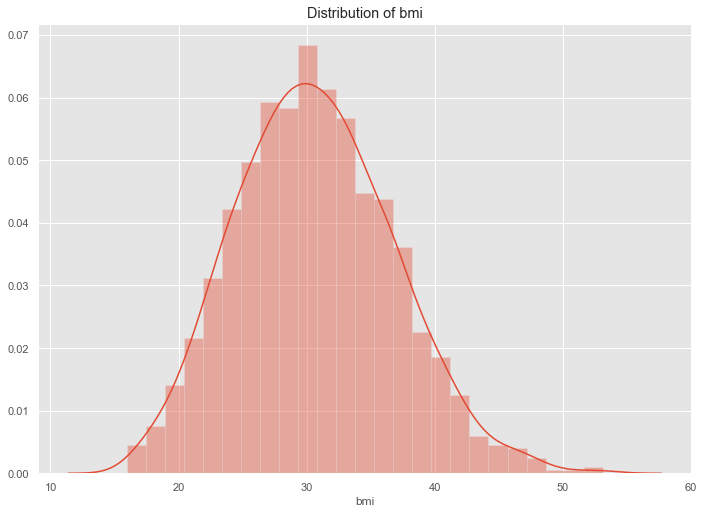

In [46]:
# Descript the distribution of bmi
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.bmi)
plt.title('Distribution of bmi')

From the distribution of bmi, we can conclude that most people's bmi is around 30, which is healthweight.

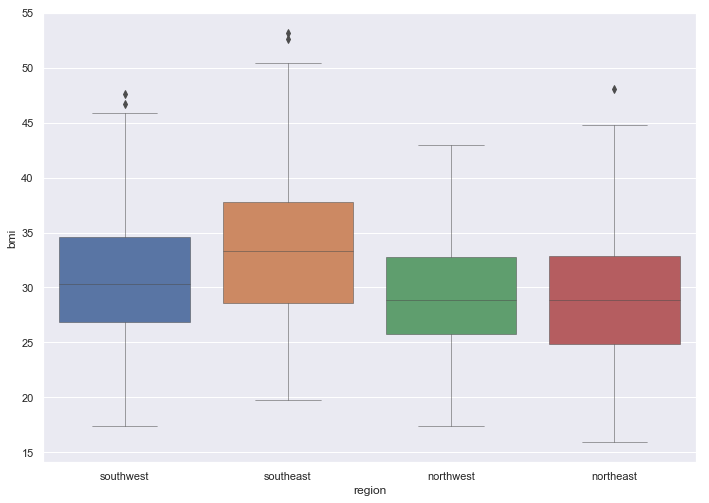

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.boxplot(x='region', y='bmi', data=df, linewidth=0.5)

We draw a boxplot to show that there is a link between bmi and region. From the boxplot, we can see in southeastern area, people's bmi is higher than other regions. 
This is interesting, so we did some digging about 'Obesity in the United States'.
We found out that in the top 10 states of obesity ranking in America, 8 states are southeastern states including Mississippi, Alabama, Louisiana, South Carolina, Tennessee, Kentucky, Arkansas and West Virginia. (Reference: https://en.wikipedia.org/wiki/Obesity_in_the_United_States)

Text(0.5, 1.0, 'bmi and age range')

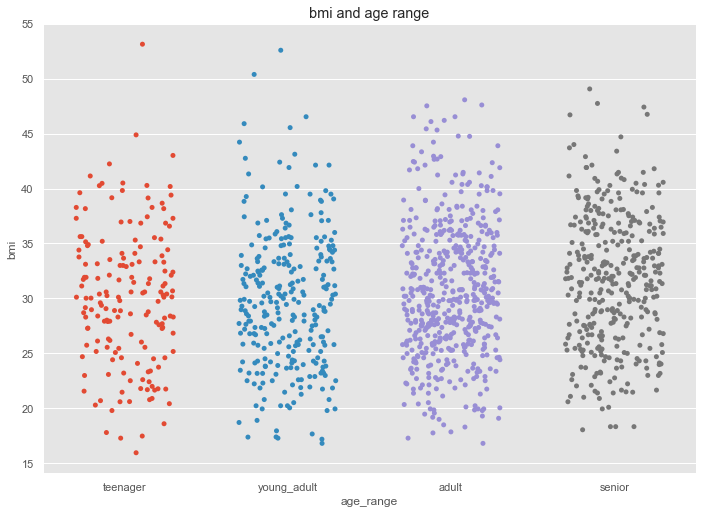

In [52]:
sns.stripplot(x='age_range',y='bmi',data=df,jitter=0.3).set_title('bmi and age range')

From the stripplot above, We also found out that age can also influence bmi. With people get older, their bmi get higher too.
It's understandable because in a medical article, it points out that when people get older, slightly higher BMI may help protect old people from thinning of the bones (osteoporosis). (Reference: https://medlineplus.gov/ency/article/007196.htm)

### 3.1.2 Visualization of Insurance Charges

Text(0.5, 1.0, 'Distribution of charges')

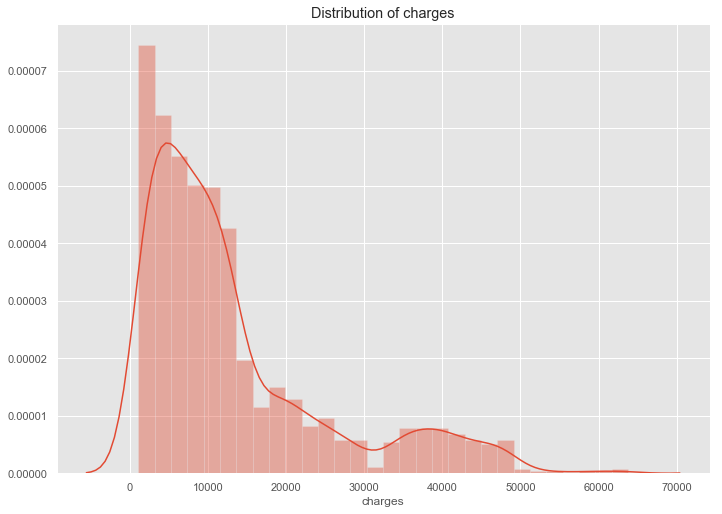

In [53]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.charges)
plt.title('Distribution of charges')

From the distribuation of charges, we can see over most people's insurance fee is under $20,000.

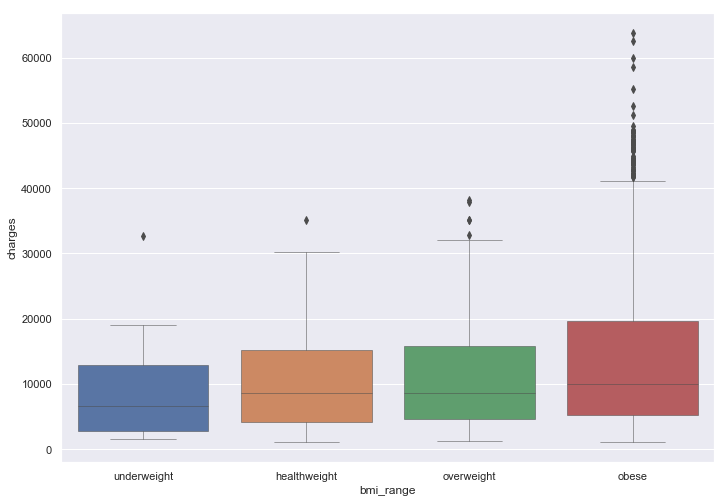

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.boxplot(x='bmi_range', y='charges', data=df, linewidth=0.5)

From the boxplot above, we can see the amount of charges is influenced by bmi. The higher your bmi is, the higher your insurance charge is. So people need to stay healthy if they want to spend less on insurance charges, people who have higher bmi should exercise a lot.

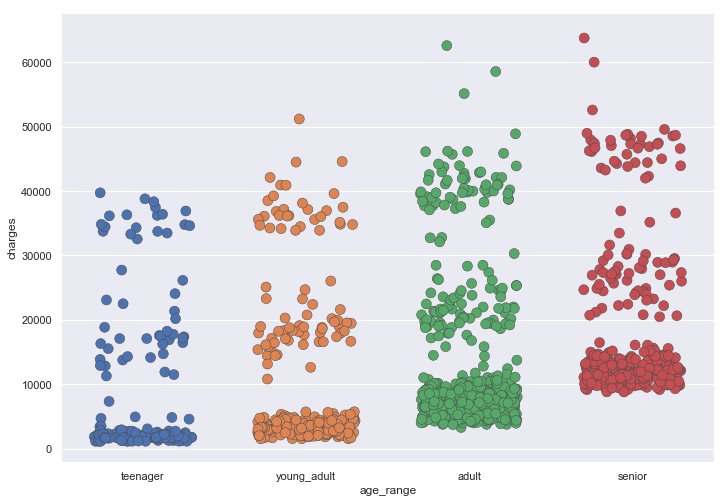

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.stripplot(x='age_range', y='charges', data=df, linewidth=0.5, size=10, jitter=0.3)

We drew a stripplot to see if age influence charges too. The answer is yes! The older you get, the more likely you need to pay more insurance charges. For instance, older people usually pay more car insurance than young people do. 

### 3.1.3 Visualization of Age

Text(0.5, 1.0, 'Distribution of age')

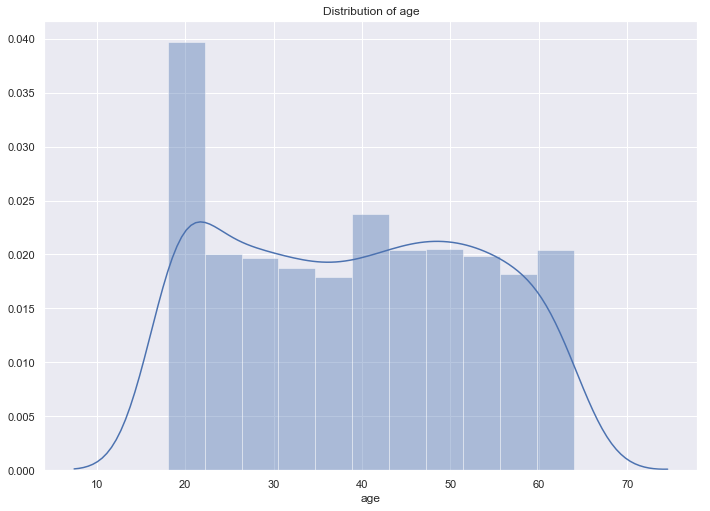

In [59]:
# Descript the distribution of age
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.age)
plt.title('Distribution of age')

From the distribution of age, we know age from 20 to 30 is the largest group of people in this dataset. But generally speaking, the distribution of age is uniform.

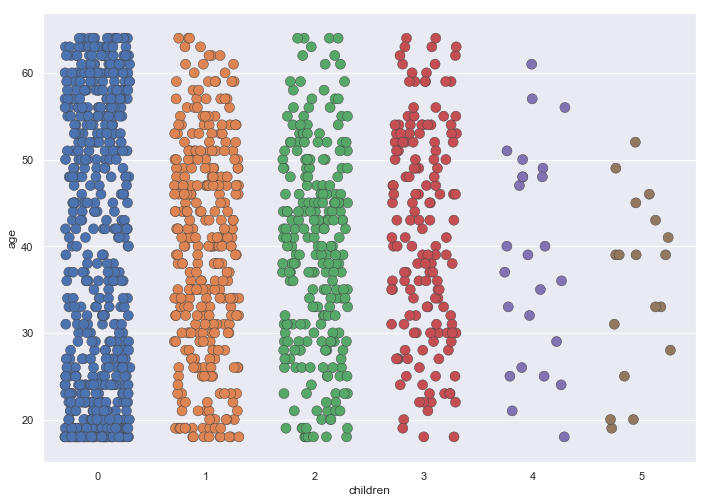

In [76]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.stripplot(x='children', y='age', data=df, linewidth=0.5, size=10, jitter=0.3)

From age-children stripplot, we can see that most people have less than 4 children and people with more than 3 children are usually under 50. It's reasonable that nowadays, people don't want to have too many kids or don't want to have kid at all in some countries. And even if people want to have more children, they have to have enough resource and energy including enough financial resource and good health condition. 

### 3.1.4 Visualization Number of Children Distribution

Text(0.5, 1.0, 'Distribution of children')

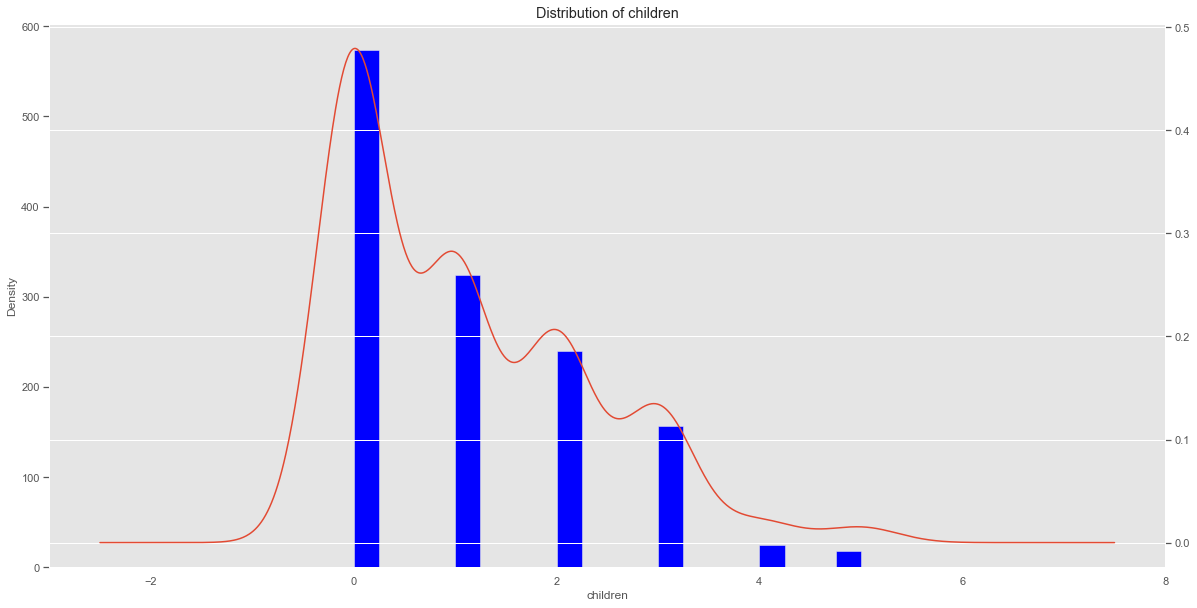

In [44]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))

# Descript the children frequency distribution
hist = df.children.plot.hist(bins=20, color='blue')
# Descript the children frequency using kde.
kde = df.children.plot.kde(secondary_y=True, bw_method=0.3)
hist.set_xlabel('children')
plt.title('Distribution of children')

From the distribution of number of children, we know most of people in this dataset have no child and only a small part of people have more than 3 children in this dataset.

### 3.1.5 Visualization of Smoking, Children and Age

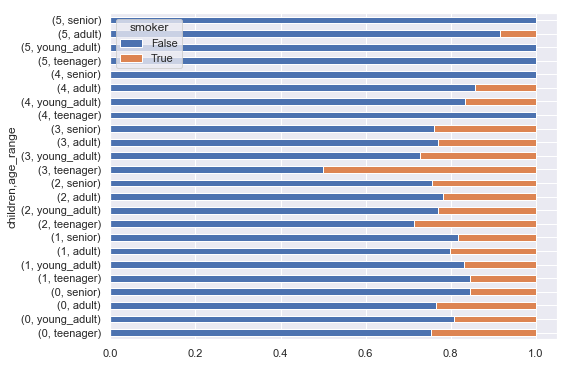

In [37]:
df_group1 = df.groupby(by=['age_range','children'])
smoke = pd.crosstab([df['children'], df['age_range']], df['smoker'].astype(bool))
smoke_rate = smoke.div(smoke.sum(1).astype(float),axis=0)
smoke_rate.plot(kind='barh', stacked=True, figsize=(8,6))
plt.show()

In [62]:
# Replace somker with 1 and non-smoker with 0.
df_change_smoker = df.replace(to_replace={'yes':1,'no':0})

In [67]:
#group by children
df_group_by_children = df_change_smoker.groupby(by='children')
df_group_by_age_range = df.groupby(by='age_range')

#Now let's calculate the smoking rate of each group
print('The smoking Rate for group of different number of children:')
print(df_group_by_children.smoker.sum() / df_group_by_children.smoker.count())
print('The smoking Rate for group of different age range:')
print(df_group_by_age_range.smoker.sum() / df_group_by_age_range.smoker.count())

The smoking Rate for group of different number of children:
children
0    0.200348
1    0.188272
2    0.229167
3    0.248408
4    0.120000
5    0.055556
Name: smoker, dtype: float64
The smoking Rate for group of different age range:
age_range
teenager       0.234940
young_adult    0.201439
adult          0.213755
senior         0.179775
Name: smoker, dtype: float64


First, we group people according to their age range and the number of children they have and we drew a crosstab to see which group of people is more likely to be smokers. 
Then we group people according to number of their children and calculate smoking rate of each group. We also group people according to age range and calculate smoking rate of each group.
From above, we can see teenager have highest smoking rate and senior have lowest smoking rate.
We can see when people have more than 3 children, smoking rate will drop, maybe it's because people are busy with looking after their children, they don't have time to do that. But people who have 3 children have the highest smoking rate, we try to find out why, from an article(Reference: https://mom.me/baby/7607-three-kids-right-number/), we know that it's easier having less than 3 children or more than 4 children compared to having 3 children. Having children is painful and stressful, maybe that's why people with 3 children are more likely to smoke. Here's what article say: “Four is easier because the kids can pair off. Especially when you have two of each. With three there is one left out. Also when it was three the baby got treated more like a baby for some reason. With four you can't indulge the youngest and she's more likely to try and keep up with the others.”(Reference: https://mom.me/baby/7607-three-kids-right-number/)

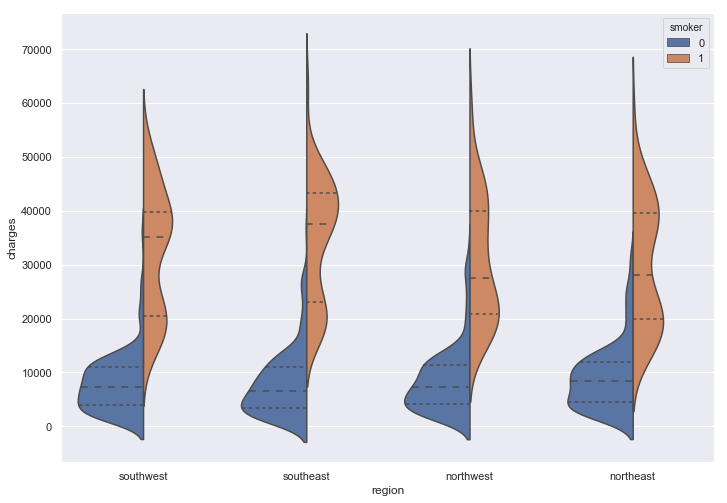

In [77]:
sns.violinplot(x="region", y="charges", hue="smoker", data=df, 
               split=True, inner="quart")

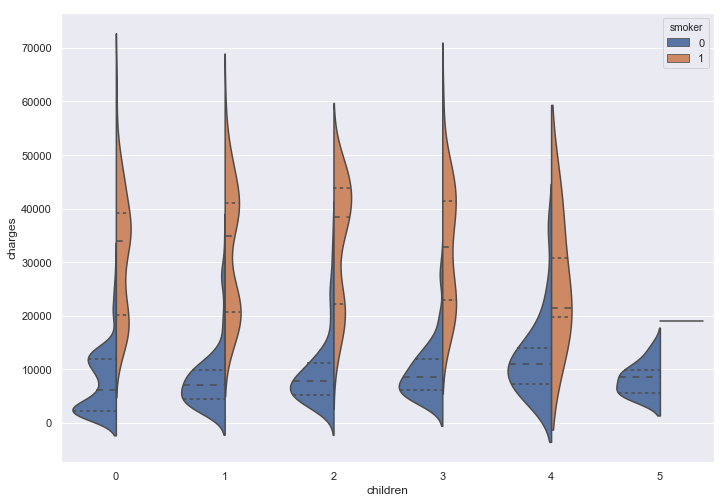

In [79]:
sns.violinplot(x="children", y="charges", hue="smoker", data=df, 
               split=True, inner="quart")

We drew a violin plot to show if smoking directly influence insurance charges. According to the first violin above, people in different regions have similar spread and shape of insurance charges. However in the same region, the distributions of people who smoke is approximately uniform, but the distributions of people who smoke is not uniform.
Along with the second violin plot, we can conclude that, no matter how many children people have or where people come from, people who don't smoke will have less insurance charges than people who smoke.